# Chapter 10 - Working with unlabled data: clustering analysis

*Unsupervised learning*: techniques of finding patters in data that is unlabeled.

*Clustering*: an unsupervised learning technique that finds groups of data that are similar.

Other important points:
- *K-means* to find centers of similarities in data
- Bottom-up approach of clustering using hierachical clustering tress
- Finding arbitrary shapes in data using density based clustering

## Grouping objects by similarity using k-means

### k-means clustering using scikit-learn

K-means is a *prototype-based clustering* algorithm, meaning that each cluster is represented by a prototype; this prototype is typically defined as the *centroid* (the average of a continuous feature) or the *medoid* (the most representative categorical point which minimizes distances to all other points). Note that the number of clusters is a hyperparameter which needs to be decided by some metric evlatuation. 

K-means is summarized in the following steps:
1. Pick $k$ random centroids
2. ASsign each example to the nearest centroid, $\mu^{(j)}, j \in {1, \dots , k}$
3. Move the centroid to the center of the examples that were assigned to it
4. Repeat steps 2 and 3 until centroids no longer move or a maximum number of iterations is reached

Generally the measure of similarity is the squared eclidean distance between points:
$$
    d(x, y)^2 = \sum_{j = 1}^m (x_j - y_j)^2 = \|x - y\|^2_ 2
$$
for the $j$th dimension o the example inputs. Based on this the k-means can be understood as an optimization probem for the sum of square errors (a.k.a. the cluster intertia):
$$
    SSE = \sum_{i=1} ^n \sum_{j=1}^k w^{(i, j)} \|x^{(i)} - \mu^{(j)}\|^2_2
$$
where $\mu^{(j)}$ is a representative point for cluster $j$ and 
$$
    w^{(i, j)} = \begin{cases}
                    1 & \text{if } x^{(i)} \in j \\
                    0 & \text{otherwise}
                 \end{cases}
$$

To illustrate, create a dataset with clusters:

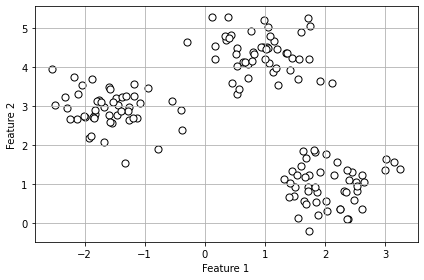

In [5]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0) 
import matplotlib.pyplot as plt 
plt.scatter(X[:, 0],
    X[:, 1],
    c='white',
    marker='o',
    edgecolor='black',
    s=50)
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.grid()
plt.tight_layout()
plt.show()

Now apply the `KMeans` from scikit-learn:

In [6]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=3,
    init='random',
    n_init=10, #run the algorithm 10 times with different initial centroids
    max_iter=300, #will stop if it converges before this point
    tol=1e-04,
    random_state=0) 
y_km = km.fit_predict(X)

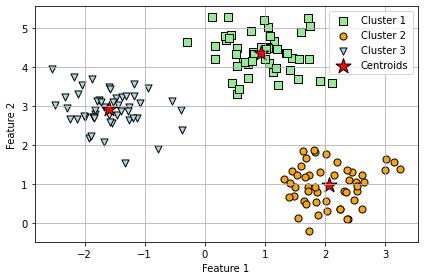

In [7]:
plt.scatter(X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1') 
plt.scatter(X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Cluster 2') 
plt.scatter(X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1) 
plt.grid()
plt.tight_layout()
plt.show()

It works well; but the drawback is having to decide on $k$. 

### A smarter way of placing the initial cluster centroids using k-means++

The *k-means++* algorithm places the initial centroids as far away from each other, which to better and more consistent results.  The algorithm can be summarized in the following steps:
1. Initialize $M$, and empty set to store $k$ centroids
2. Randomly choose the first centroid, $\mu^{(j)}$, from input examples and assign it to $M$
3. For every example, $x^{(i)}$, not in $M$, find the minimum square distance, $d(x^{(i)}, M)^2$, to and of the centroid in $M$.
4. To assign the next centroid, $\mu^{(p)}$, use a weighted probability distibution equal to
$$
    \frac{d(\mu^{(p)}, M)^2}{\sum_i d(x^{(i)}, M)^2}
$$
5. Repeat steps 3 and 4 until $k$ centroids are chosen
6. Proceed with the basic k-means algorithm

To use the algorithm with `KMeans`, use `init='k-means++'`.

### Hard versus soft clustering